In [31]:
# Data handling
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report


In [32]:
df = pd.read_csv("weather_data.csv")
df.head()


,Date,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,...,SeaLevelPressureAvgInches,SeaLevelPressureLowInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches,Events
0,21-12-13,74,60,45,67,49,43,93,75,57,...,29.68,29.59,10,7,2,20,4,31,0.46,"Rain , Thunderstorm"
1,22-12-13,56,48,39,43,36,28,93,68,43,...,30.13,29.87,10,10,5,16,6,25,0,
2,23-12-13,58,45,32,31,27,23,76,52,27,...,30.49,30.41,10,10,10,8,3,12,0,
3,24-12-13,61,46,31,36,28,21,89,56,22,...,30.45,30.3,10,10,7,12,4,20,0,
4,25-12-13,58,50,41,44,40,36,86,71,56,...,30.33,30.27,10,10,7,10,2,16,T,


In [33]:
print(df.columns)
print(df.isnull().sum())


Index(['Date', 'TempHighF', 'TempAvgF', 'TempLowF', 'DewPointHighF',
       'DewPointAvgF', 'DewPointLowF', 'HumidityHighPercent',
       'HumidityAvgPercent', 'HumidityLowPercent',
       'SeaLevelPressureHighInches', 'SeaLevelPressureAvgInches',
       'SeaLevelPressureLowInches', 'VisibilityHighMiles',
       'VisibilityAvgMiles', 'VisibilityLowMiles', 'WindHighMPH', 'WindAvgMPH',
       'WindGustMPH', 'PrecipitationSumInches', 'Events'],
      dtype='object')
Date                          0
TempHighF                     0
TempAvgF                      0
TempLowF                      0
DewPointHighF                 0
DewPointAvgF                  0
DewPointLowF                  0
HumidityHighPercent           0
HumidityAvgPercent            0
HumidityLowPercent            0
SeaLevelPressureHighInches    0
SeaLevelPressureAvgInches     0
SeaLevelPressureLowInches     0
VisibilityHighMiles           0
VisibilityAvgMiles            0
VisibilityLowMiles            0
WindHighMPH         

In [34]:
df.replace("-", np.nan, inplace=True)


In [35]:
keep_columns = [
    "TempAvgF",
    "DewPointAvgF",
    "HumidityAvgPercent",
    "SeaLevelPressureAvgInches",
    "WindAvgMPH",
    "VisibilityAvgMiles",
    "PrecipitationSumInches",
    "Events"
]

df = df[keep_columns]


In [36]:
numeric_columns = [
    "TempAvgF",
    "DewPointAvgF",
    "HumidityAvgPercent",
    "SeaLevelPressureAvgInches",
    "WindAvgMPH",
    "VisibilityAvgMiles"
]
df[numeric_columns] = df[numeric_columns].apply(
    pd.to_numeric, 
    errors="coerce"
)


In [37]:
# Convert PrecipitationSumInches to numeric, coerce errors to NaN
df["PrecipitationSumInches"] = pd.to_numeric(df["PrecipitationSumInches"], errors="coerce")

# Now create the Rain target
df["Rain"] = np.where(
    (df["PrecipitationSumInches"] > 0) |
    (df["Events"].str.contains("Rain", na=False)),
    1,
    0
)


In [38]:
df.drop(columns=["PrecipitationSumInches", "Events"], inplace=True)


In [39]:
print(df.head())
print(df.dtypes)


   TempAvgF  DewPointAvgF  HumidityAvgPercent  SeaLevelPressureAvgInches  \
0        60          49.0                75.0                      29.68   
1        48          36.0                68.0                      30.13   
2        45          27.0                52.0                      30.49   
3        46          28.0                56.0                      30.45   
4        50          40.0                71.0                      30.33   

   WindAvgMPH  VisibilityAvgMiles  Rain  
0         4.0                 7.0     1  
1         6.0                10.0     0  
2         3.0                10.0     0  
3         4.0                10.0     0  
4         2.0                10.0     0  
TempAvgF                       int64
DewPointAvgF                 float64
HumidityAvgPercent           float64
SeaLevelPressureAvgInches    float64
WindAvgMPH                   float64
VisibilityAvgMiles           float64
Rain                           int64
dtype: object


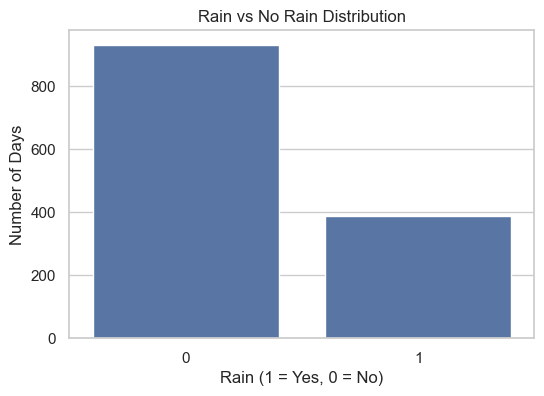

In [40]:
plt.figure(figsize=(6,4))
sns.countplot(x="Rain", data=df)
plt.title("Rain vs No Rain Distribution")
plt.xlabel("Rain (1 = Yes, 0 = No)")
plt.ylabel("Number of Days")
plt.show()


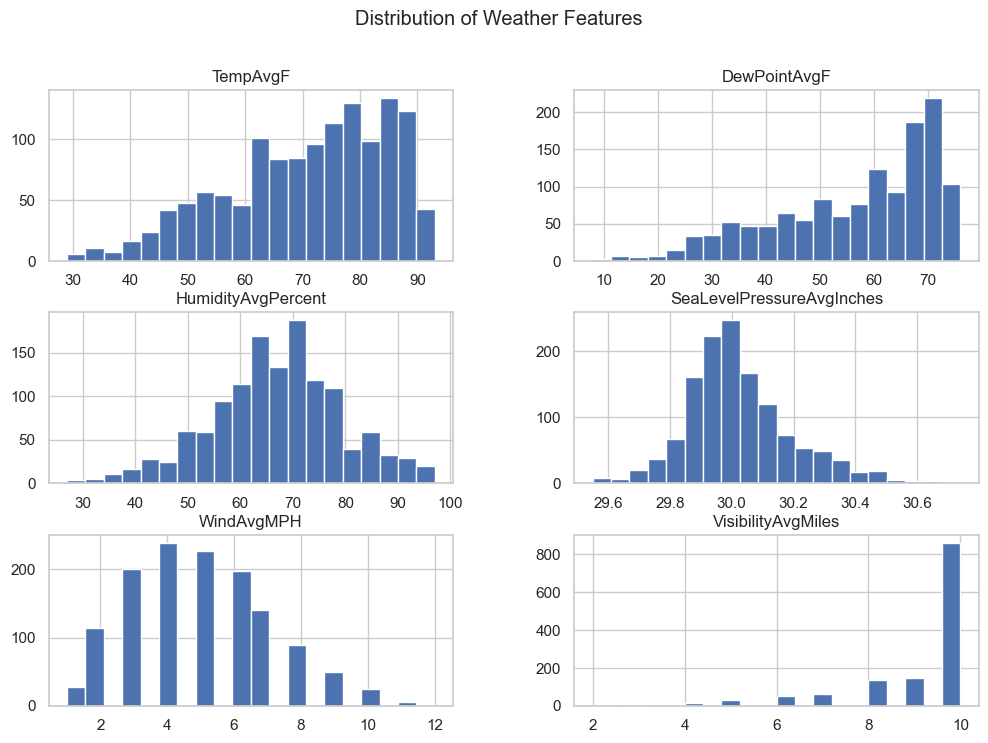

In [41]:
df.drop("Rain", axis=1).hist(
    figsize=(12,8),
    bins=20
)
plt.suptitle("Distribution of Weather Features")
plt.show()


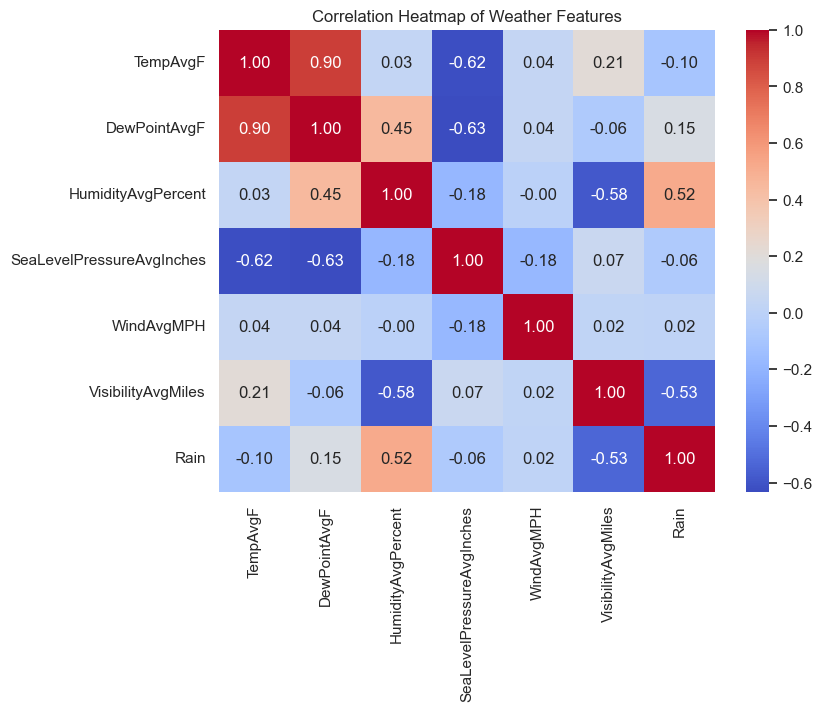

In [42]:
plt.figure(figsize=(8,6))
sns.heatmap(
    df.corr(),
    annot=True,
    cmap="coolwarm",
    fmt=".2f"
)
plt.title("Correlation Heatmap of Weather Features")
plt.show()


In [43]:
X = df.drop("Rain", axis=1)
y = df["Rain"]

In [44]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [45]:
preprocessor = Pipeline([
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler())
])


In [46]:
log_reg = Pipeline([
    ("preprocess", preprocessor),
    ("model", LogisticRegression(max_iter=1000, random_state=42))
])

log_reg.fit(X_train, y_train)

y_pred_lr = log_reg.predict(X_test)

print("Logistic Regression")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))


Logistic Regression
Accuracy: 0.8409090909090909
              precision    recall  f1-score   support

           0       0.84      0.95      0.89       186
           1       0.83      0.58      0.68        78

    accuracy                           0.84       264
   macro avg       0.84      0.76      0.79       264
weighted avg       0.84      0.84      0.83       264



In [47]:
dt = Pipeline([
    ("preprocess", preprocessor),
    ("model", DecisionTreeClassifier(max_depth=5, random_state=42))
])

dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)

print("Decision Tree")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))


Decision Tree
Accuracy: 0.7992424242424242
              precision    recall  f1-score   support

           0       0.84      0.88      0.86       186
           1       0.68      0.60      0.64        78

    accuracy                           0.80       264
   macro avg       0.76      0.74      0.75       264
weighted avg       0.79      0.80      0.80       264



In [48]:
rf = Pipeline([
    ("imputer", SimpleImputer(strategy="mean")),
    ("model", RandomForestClassifier(
        n_estimators=200,
        max_depth=7,
        max_features="sqrt",
        random_state=42
    ))
])

rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print("Random Forest")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Random Forest
Accuracy: 0.8409090909090909
              precision    recall  f1-score   support

           0       0.85      0.94      0.89       186
           1       0.80      0.62      0.70        78

    accuracy                           0.84       264
   macro avg       0.83      0.78      0.79       264
weighted avg       0.84      0.84      0.83       264



In [49]:
knn = Pipeline([
    ("preprocess", preprocessor),
    ("model", KNeighborsClassifier(n_neighbors=5, weights="distance"))
])

knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)

print("KNN")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))


KNN
Accuracy: 0.8143939393939394
              precision    recall  f1-score   support

           0       0.84      0.91      0.87       186
           1       0.73      0.59      0.65        78

    accuracy                           0.81       264
   macro avg       0.79      0.75      0.76       264
weighted avg       0.81      0.81      0.81       264



In [50]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
results = pd.DataFrame({
    "Model": [
        "Logistic Regression",
        "Decision Tree",
        "Random Forest",
        "KNN"
    ],
    "Accuracy": [
        accuracy_score(y_test, y_pred_lr),
        accuracy_score(y_test, y_pred_dt),
        accuracy_score(y_test, y_pred_rf),
        accuracy_score(y_test, y_pred_knn)
    ],
    "Precision": [
        precision_score(y_test, y_pred_lr),
        precision_score(y_test, y_pred_dt),
        precision_score(y_test, y_pred_rf),
        precision_score(y_test, y_pred_knn)
    ],
    "Recall": [
        recall_score(y_test, y_pred_lr),
        recall_score(y_test, y_pred_dt),
        recall_score(y_test, y_pred_rf),
        recall_score(y_test, y_pred_knn)
    ],
    "F1-score": [
        f1_score(y_test, y_pred_lr),
        f1_score(y_test, y_pred_dt),
        f1_score(y_test, y_pred_rf),
        f1_score(y_test, y_pred_knn)
    ]
})

results


,Model,Accuracy,Precision,Recall,F1-score
0,Logistic Regression,0.840909,0.833333,0.576923,0.681818
1,Decision Tree,0.799242,0.681159,0.602564,0.639456
2,Random Forest,0.840909,0.800000,0.615385,0.695652
3,KNN,0.814394,0.730159,0.589744,0.652482


In [ ]:
import pandas as pd

# Features used to predict rainfall
numeric_columns = [
    "TempAvgF",
    "DewPointAvgF",
    "HumidityAvgPercent",
    "SeaLevelPressureAvgInches",
    "WindAvgMPH",
    "VisibilityAvgMiles"
]

# Dictionary of trained models
models = {
    "Logistic Regression": log_reg,
    "Decision Tree": dt,
    "Random Forest": rf,
    "KNN": knn
}

def rainfall_cli():
    print("="*45)
    print("Rainfall Prediction System")
    print("="*45, "\n")
    
    print("Please enter the following weather details:\n")
    
    # Collect user input
    user_input = {}
    for col in numeric_columns:
        while True:
            try:
                val = float(input(f"{col.replace('_', ' ')}: "))
                user_input[col] = val
                break
            except ValueError:
                print("Invalid input. Please enter a numeric value.")
    
    # Create a DataFrame for prediction
    user_data = pd.DataFrame([user_input], columns=numeric_columns)
    
    print("\n" + "-"*45)
    print("Predictions from all models:")
    print("-"*45)
    
    for name, model in models.items():
        pred = model.predict(user_data)[0]
        result = "🌧️ Rain" if pred == 1 else "☀️ No Rain"
        print(f"{name:<20}: {result}")
    
    print("-"*45)
    print("Thank you for using the Rainfall Prediction System!")
    print("="*45, "\n")

# Run CLI
rainfall_cli()


Rainfall Prediction System

Please enter the following weather details:



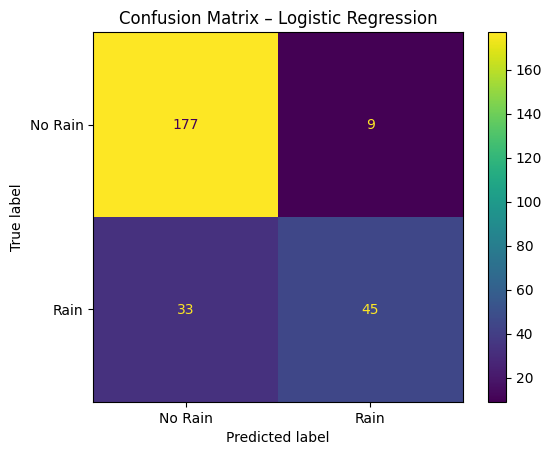

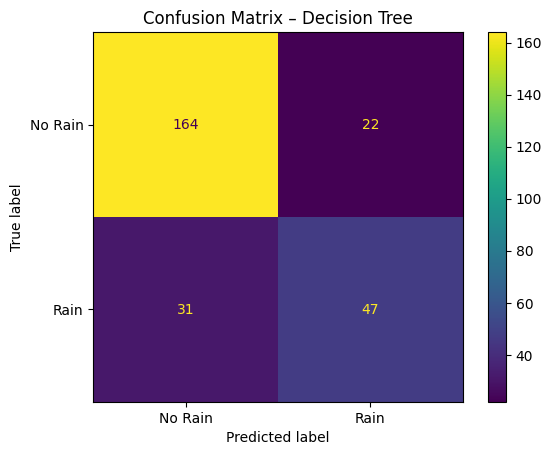

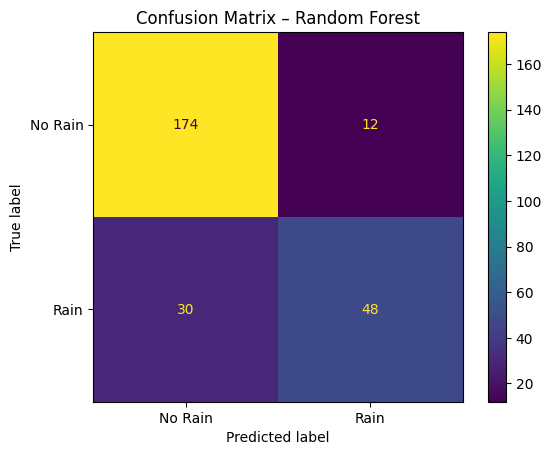

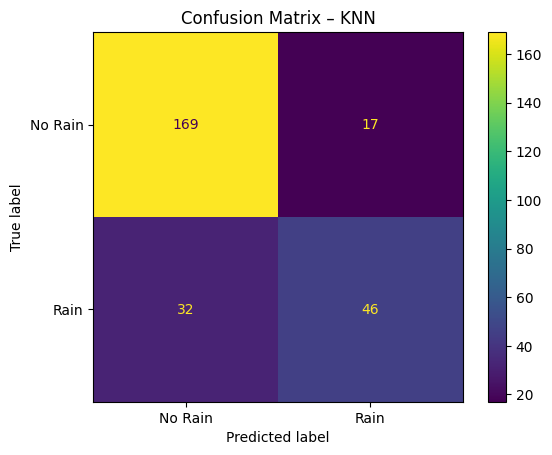

In [21]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

predictions = {
    "Logistic Regression": y_pred_lr,
    "Decision Tree": y_pred_dt,
    "Random Forest": y_pred_rf,
    "KNN": y_pred_knn
}

for model_name, y_pred in predictions.items():
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(
        confusion_matrix=cm,
        display_labels=["No Rain", "Rain"]
    )
    
    disp.plot()
    plt.title(f"Confusion Matrix – {model_name}")
    plt.show()


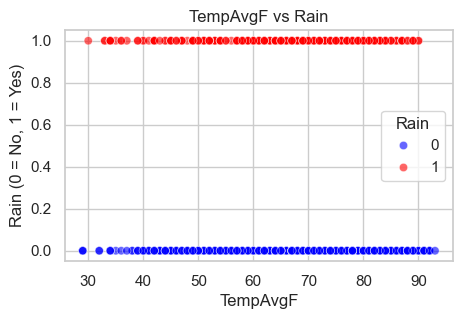

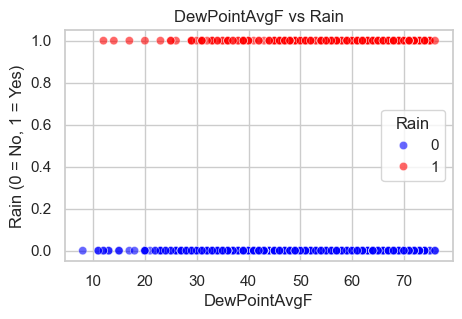

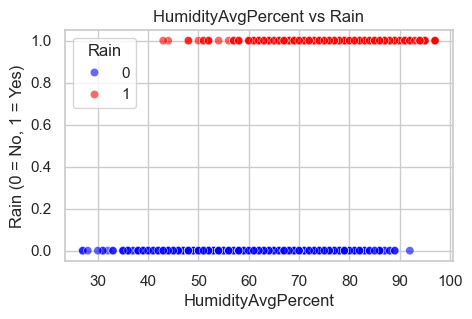

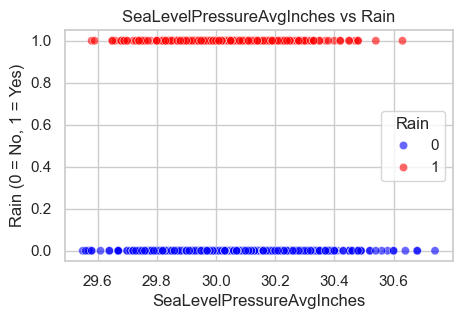

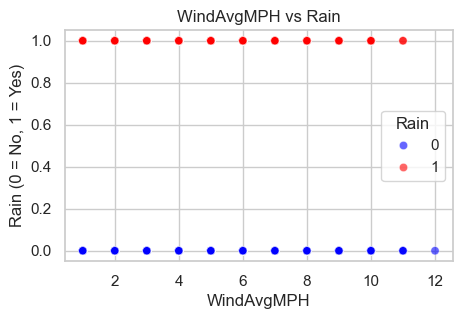

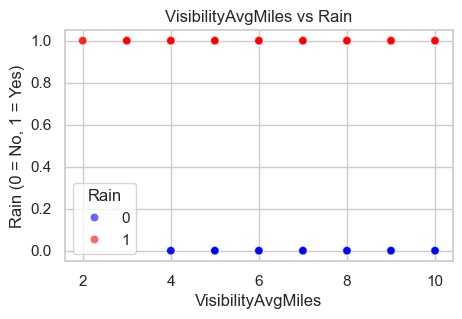

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

numeric_columns = [
    "TempAvgF",
    "DewPointAvgF",
    "HumidityAvgPercent",
    "SeaLevelPressureAvgInches",
    "WindAvgMPH",
    "VisibilityAvgMiles"
]

# Set Seaborn style
sns.set(style="whitegrid")

# Plot scatter plots for each feature vs Rain
for col in numeric_columns:
    plt.figure(figsize=(5, 3))
    sns.scatterplot(
        x=col, 
        y="Rain", 
        data=df, 
        hue="Rain", 
        palette={0: "blue", 1: "red"},
        alpha=0.6
    )
    plt.title(f"{col} vs Rain")
    plt.ylabel("Rain (0 = No, 1 = Yes)")
    plt.xlabel(col)
    plt.legend(title="Rain")
    plt.show()


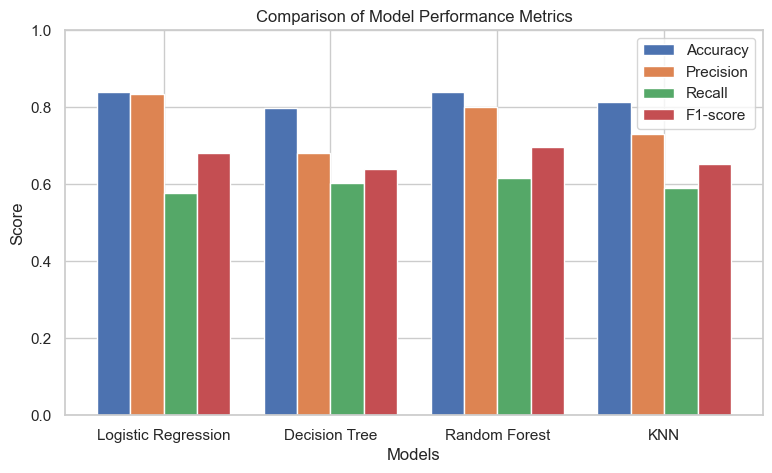

In [30]:
metrics = ["Accuracy", "Precision", "Recall", "F1-score"]
x = np.arange(len(results["Model"]))
width = 0.2

plt.figure(figsize=(9, 5))

for i, metric in enumerate(metrics):
    plt.bar(x + i*width, results[metric], width, label=metric)

plt.xlabel("Models")
plt.ylabel("Score")
plt.title("Comparison of Model Performance Metrics")
plt.xticks(x + width*1.5, results["Model"])
plt.ylim(0, 1)
plt.legend()
plt.show()